# Import Libraries

In [1]:
import pickle
import numpy as np
import os
import sys
sys.path.insert(0, os.getcwd()[:-6])
from v2i.src.core.common import loadPKL, savePKL, readYaml
import matplotlib.pyplot as plt

# Experiment Related Details

1. Experiment ID - /home/mayank/ray_results/WithFullComm/PPO_v2i-v0_0_2019-08-24_14-32-0332s3e3o7
2. Data File - /home/mayank/ray_results/WithFullComm/PPO_v2i-v0_0_2019-08-24_14-32-0332s3e3o7/tfEnabledDataCheck2000/bumdist_tf_enabled.pkl
3. AlgoConfig - /home/mayank/Documents/upgraded-octo-lamp/experiments/WithFullComm/configFiles/ppo-algo-config.yml


In [2]:
datFile = "/home/mayank/ray_results/WithFullComm/PPO_v2i-v0_0_2019-08-24_14-32-0332s3e3o7/tfEnabledDataCheck2000/bumdist_tf_enabled.pkl"

# Load Data file

In [3]:
simData = loadPKL(datFile)

# Start Analysis

### Set the density to analyze

In [4]:
density = 0.1

In [5]:
simData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data'])

In [6]:
simData['max-episode-length']

1200

In [7]:
simData['data'].keys()

dict_keys([0.1, 0.3, 0.5, 0.7, 0.9])

In [8]:
simData['data'][density].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [9]:
simData['data'][density][0].keys()

dict_keys(['speed', 'rewards', 'actions', 'bum2bumdist', 'EgoMaxSpeed'])

In [10]:
egoSpeedofprematureEpisodes = []
bum2bumdistofprematureEpisodes = []
prematureEpisodeNumbers = []
actionsOfPrematureEpisodes = []

collisionCount = 0

for episode in simData['data'][density]:
    if len(simData['data'][density][episode]['speed']) < simData['max-episode-length']:
        egoSpeedofprematureEpisodes.append(simData['data'][density][episode]['speed'])
        bum2bumdistofprematureEpisodes.append(simData['data'][density][episode]['bum2bumdist'][-1])
        prematureEpisodeNumbers.append(episode)
        actionsOfPrematureEpisodes.append(simData['data'][density][episode]['actions'][-1])
        collisionCount += 1

# Metrics

In [11]:
print("Number of Episodes tested : ", len(simData['data'][density]))
print("Number of Episodes ended with collision ", collisionCount/len(simData['data'][density]) * 100, "%")

Number of Episodes tested :  80
Number of Episodes ended with collision  23.75 %


### Plot for ego vehicle speed for last $t$ time steps before collision

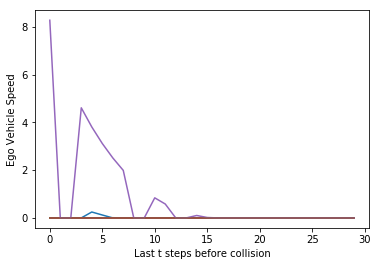

In [22]:
numLastSteps = 30
numEpisodes = 5

for idx, plot in enumerate(egoSpeedofprematureEpisodes):
    newList = plot[-numLastSteps:]
    newList = [x * 2 for x in newList]
    plt.plot(np.arange(numLastSteps), newList)
    
    if idx == numEpisodes:
        break
plt.xlabel("Last t steps before collision")
plt.ylabel("Ego Vehicle Speed")
plt.show()

In [15]:
actionsOfPrematureEpisodes

[('dec', 'reg_0'),
 ('dec', 'reg_1'),
 ('dec', 'reg_1'),
 ('dec', 'reg_1'),
 ('dec', 'null'),
 ('dec', 'reg_0'),
 ('dec', 'reg_1'),
 ('dec', 'null'),
 ('dec', 'null'),
 ('dec', 'null'),
 ('dec', 'null'),
 ('dec', 'reg_0'),
 ('dec', 'null'),
 ('dec', 'reg_0'),
 ('dec', 'null'),
 ('dec', 'reg_0'),
 ('dec', 'reg_0'),
 ('dec', 'null'),
 ('dec', 'null')]